In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

In [ ]:
import kaggle

OSError: ignored

In [ ]:
! mv /content/kaggle.json /root/.kaggle/
import kaggle

In [ ]:
! kaggle competitions download -c aerial-cactus-identification # Downloading dataset from kaggle

100% 12.0M/12.0M [00:01<00:00, 13.2MB/s]
100% 12.0M/12.0M [00:01<00:00, 6.57MB/s]


In [ ]:
! unzip -q aerial-cactus-identification.zip

In [ ]:
! unzip -q train.zip

In [ ]:
label=pd.read_csv('/content/train.csv') # Loading data
label.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [ ]:
label.has_cactus.value_counts()

1    13136
0     4364
Name: has_cactus, dtype: int64

<Axes: xlabel='has_cactus', ylabel='Count'>

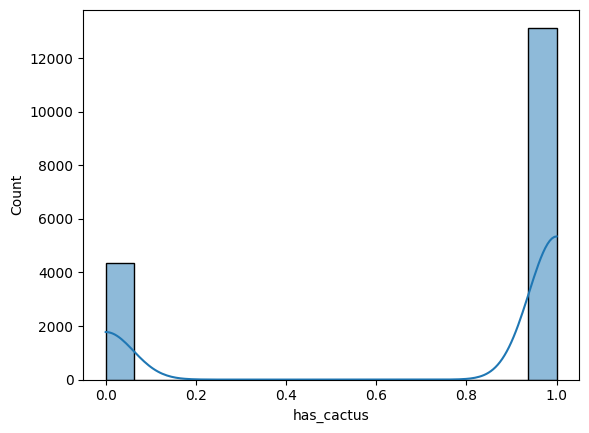

In [ ]:
sns.histplot(label,x='has_cactus',kde=True) # Checking class imbalance

In [ ]:
len(os.listdir('train/')) # Length of directory

17500

In [ ]:
os.listdir('train/')[2]

'ec6a0e77790139b541c20ec6bf210050.jpg'

In [ ]:
image=cv2.imread('train/000c8a36845c0208e833c79c1bffedd1.jpg')

In [ ]:
image.shape

(32, 32, 3)

In [ ]:
label[label['id']==os.listdir('train/')[v]]['has_cactus'].values[0]

1

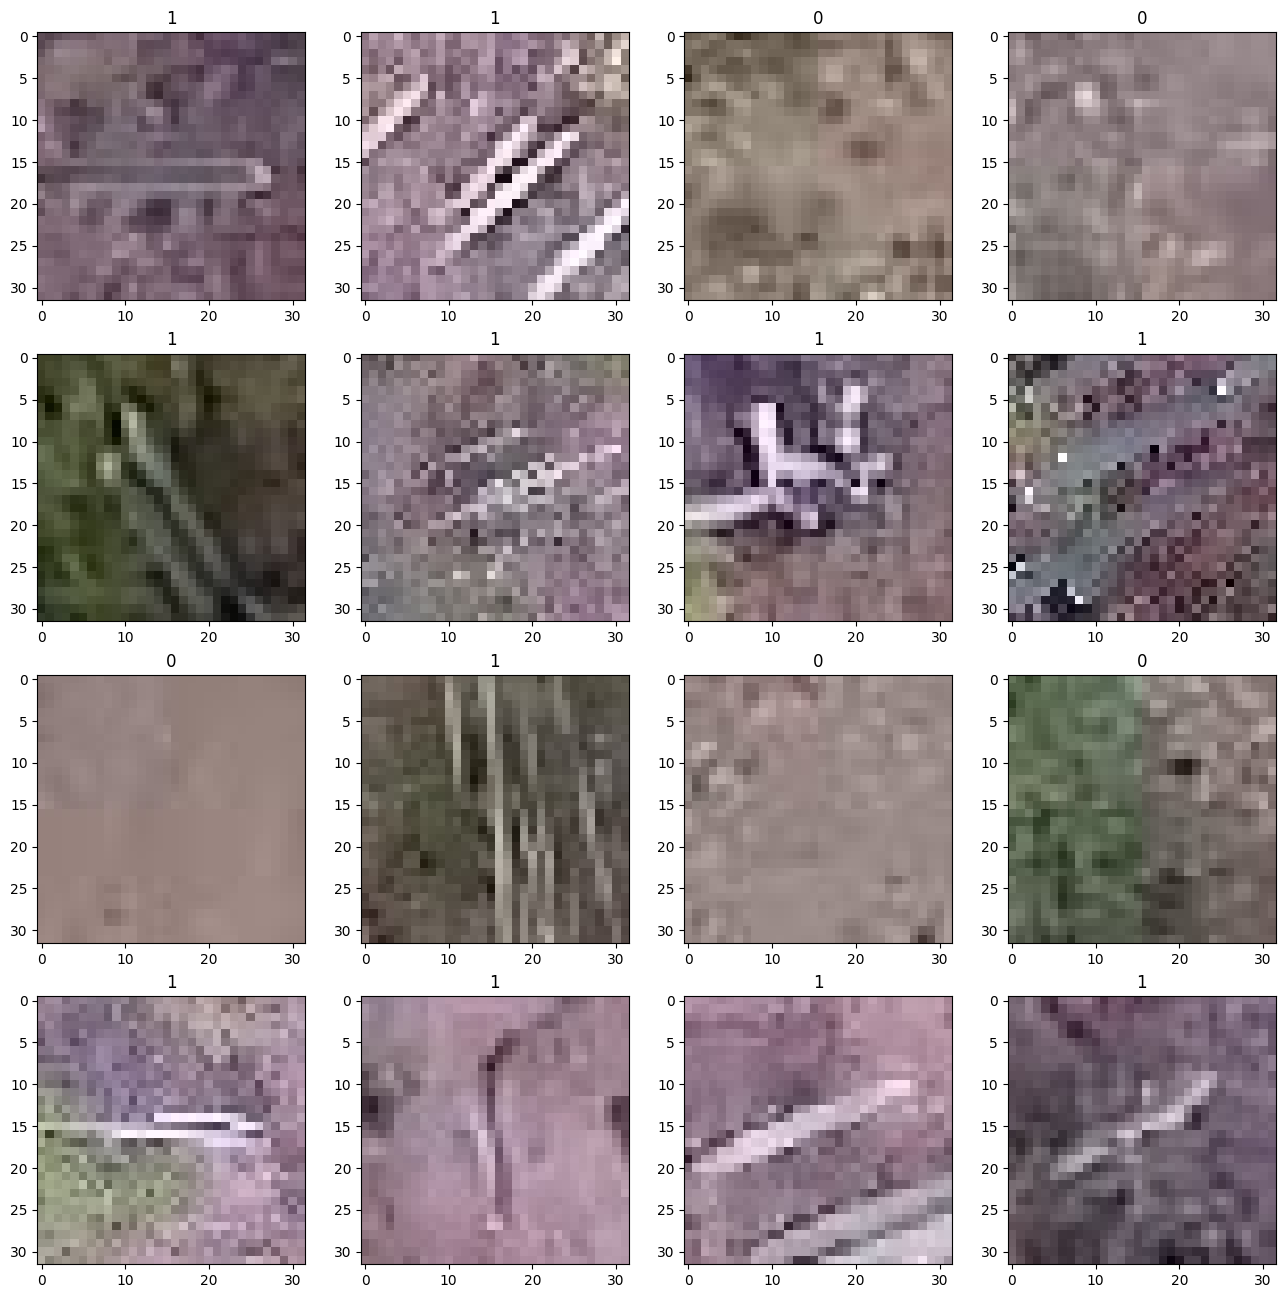

In [ ]:
# Visualizing random cactus images captured in aerial
r=np.random.randint(1,17500,16)
plt.figure(figsize=(16,16))
for i,v in enumerate(r):
  plt.subplot(4,4,i+1)
  image=cv2.imread('train/'+os.listdir('train/')[v])
  plt.title(label[label['id']==os.listdir('train/')[v]]['has_cactus'].values[0])
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.imshow(image)

In [ ]:
import tensorflow as tf

In [ ]:
image=cv2.imread('train/0011485b40695e9138e92d0b3fb55128.jpg')

In [ ]:
image=np.expand_dims(image,axis=0)
image.shape

(1, 32, 32, 3)

In [ ]:
print('max',(np.max(image)))
print('min',(np.min(image)))
print('std',(np.std(image)))

max 234
min 4
std 28.8561514234935


In [ ]:
# Image data generator
idg=tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=0,
                                                    width_shift_range=0,
                                                    height_shift_range=0,
                                                    horizontal_flip=False,
                                                    vertical_flip=False,
                                                    validation_split=0.1,
                                                    brightness_range=(0,1),
                                                    channel_shift_range=12.5)

# EDA

In [ ]:
image_1=idg.flow(image)

In [ ]:
type(image_1)

keras.preprocessing.image.NumpyArrayIterator

In [ ]:
image_p=cv2.imread('train/0011485b40695e9138e92d0b3fb55128.jpg')

In [ ]:
image_n=image_1.next()

In [ ]:
image_p

array([[[146, 133, 147],
        [121, 108, 122],
        [102,  87, 101],
        ...,
        [146, 124, 148],
        [149, 127, 151],
        [114,  92, 116]],

       [[135, 122, 136],
        [147, 134, 148],
        [133, 118, 132],
        ...,
        [167, 145, 169],
        [122, 100, 124],
        [123, 101, 125]],

       [[104,  91, 107],
        [108,  95, 111],
        [130, 114, 131],
        ...,
        [115,  94, 119],
        [122, 101, 126],
        [140, 119, 144]],

       ...,

       [[121, 120, 129],
        [126, 125, 134],
        [137, 133, 145],
        ...,
        [193, 175, 198],
        [109,  93, 116],
        [ 88,  75,  97]],

       [[100, 103, 108],
        [108, 111, 116],
        [123, 122, 132],
        ...,
        [ 88,  70,  93],
        [159, 140, 165],
        [138, 122, 146]],

       [[146, 151, 154],
        [115, 119, 124],
        [125, 126, 136],
        ...,
        [135, 115, 138],
        [127, 108, 133],
        [132, 113, 138]]

In [ ]:
image_n

array([[[[37., 34., 37.],
         [30., 27., 31.],
         [26., 22., 25.],
         ...,
         [37., 31., 37.],
         [38., 32., 38.],
         [29., 23., 29.]],

        [[34., 31., 34.],
         [37., 34., 37.],
         [34., 30., 33.],
         ...,
         [42., 37., 43.],
         [31., 25., 31.],
         [31., 25., 32.]],

        [[26., 23., 27.],
         [27., 24., 28.],
         [33., 29., 33.],
         ...,
         [29., 24., 30.],
         [31., 25., 32.],
         [35., 30., 36.]],

        ...,

        [[30., 30., 33.],
         [32., 32., 34.],
         [35., 34., 37.],
         ...,
         [49., 44., 50.],
         [27., 23., 29.],
         [22., 19., 24.]],

        [[25., 26., 27.],
         [27., 28., 29.],
         [31., 31., 33.],
         ...,
         [22., 17., 23.],
         [40., 35., 42.],
         [35., 31., 37.]],

        [[37., 38., 39.],
         [29., 30., 31.],
         [32., 32., 34.],
         ...,
         [34., 29., 35.],
        

In [ ]:
image_n=image_n.reshape((32,32,3))

In [ ]:
image_n.shape

(32, 32, 3)

In [ ]:
image_n=image_n.astype(dtype='int')

In [ ]:
image_n

array([[[37, 34, 37],
        [30, 27, 31],
        [26, 22, 25],
        ...,
        [37, 31, 37],
        [38, 32, 38],
        [29, 23, 29]],

       [[34, 31, 34],
        [37, 34, 37],
        [34, 30, 33],
        ...,
        [42, 37, 43],
        [31, 25, 31],
        [31, 25, 32]],

       [[26, 23, 27],
        [27, 24, 28],
        [33, 29, 33],
        ...,
        [29, 24, 30],
        [31, 25, 32],
        [35, 30, 36]],

       ...,

       [[30, 30, 33],
        [32, 32, 34],
        [35, 34, 37],
        ...,
        [49, 44, 50],
        [27, 23, 29],
        [22, 19, 24]],

       [[25, 26, 27],
        [27, 28, 29],
        [31, 31, 33],
        ...,
        [22, 17, 23],
        [40, 35, 42],
        [35, 31, 37]],

       [[37, 38, 39],
        [29, 30, 31],
        [32, 32, 34],
        ...,
        [34, 29, 35],
        [32, 27, 34],
        [33, 28, 35]]])

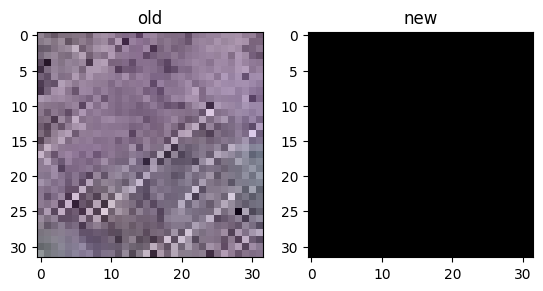

In [ ]:
plt.subplot(121)
plt.title('old')
plt.imshow(image_p)

plt.subplot(122)
plt.title('new')
plt.imshow(image)

In [ ]:
image.shape

(32, 32, 3)

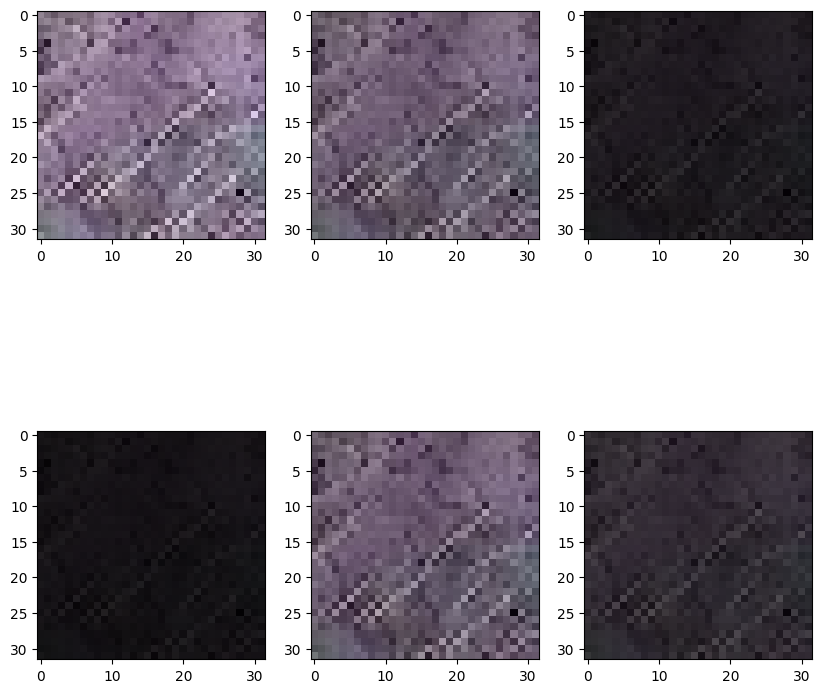

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
plt.imshow(image)

for i in range(2,7):
  plt.subplot(2,3,i)
  image1=np.expand_dims(image,axis=0)
  image1=idg.flow(image1)
  image2=image1.next()
  image2=image2.reshape((32,32,3))
  image2=image2.astype(dtype='int')
  plt.imshow(image2)

# Modelling

In [ ]:
for i in range(label.shape[0]):
  if label.iloc[i,-1]==1:
    label.iloc[i,-1]='yes'
  else:
    label.iloc[i,-1]='no'


In [ ]:
label.sample(5)

,id,has_cactus
2729,264cda6ec5c1daf530d450f18dbb4ec3.jpg,no
5641,51575b9d2734573a07d2a3f62e6a8b2e.jpg,no
6843,628fbd5eaa37b5a08be9598ae5f49f82.jpg,yes
13491,c3bbc176a534107ffb7b28aff9ab0da3.jpg,no
14937,d99068e7493d8f6881b749af3105ab3f.jpg,yes


In [ ]:
b=32

train_idg=idg.flow_from_dataframe(label,'train/',x_col='id',y_col='has_cactus',target_size=(150,150),batch_size=b,
                                  subset='training')

val_idg=idg.flow_from_dataframe(label,'train/',x_col='id',y_col='has_cactus',target_size=(150,150),batch_size=b,
                                  subset='validation')

Found 15750 validated image filenames belonging to 2 classes.
Found 1750 validated image filenames belonging to 2 classes.


In [ ]:
# Downloading VGG16 model
vgg=tf.keras.applications.VGG16(include_top=False,input_shape=(150,150,3),pooling='same')

In [ ]:
# Freezing vgg16 layers
vgg.trainable=False

In [ ]:
# Adding dense and output layers
gap=tf.keras.layers.GlobalAveragePooling2D(name='GAPLayer') (vgg.output)
dropout=tf.keras.layers.Dropout(0.3,name='DropoutLayer') (gap)
dense1=tf.keras.layers.Dense(512,name='HiddenLayer1',activation='relu') (dropout)
dense2=tf.keras.layers.Dense(256,name='HiddenLayer2',activation='relu') (dense1)
output=tf.keras.layers.Dense(2,name='OutputLayer',activation='softmax') (dense2)

# Final Model
model=tf.keras.models.Model(inputs=[vgg.input],outputs=output)

# Model Summary
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.categorical_crossentropy,
              metrics=['acc'])

In [ ]:
model.fit(train_idg,batch_size=b,epochs=15,validation_data=val_idg)

Epoch 1/15
493/493 [==============================] - 50s 98ms/step - loss: 0.2433 - acc: 0.9023 - val_loss: 0.1203 - val_acc: 0.9594
Epoch 2/15
493/493 [==============================] - 48s 97ms/step - loss: 0.1588 - acc: 0.9382 - val_loss: 0.0955 - val_acc: 0.9640
Epoch 3/15
493/493 [==============================] - 48s 98ms/step - loss: 0.1377 - acc: 0.9479 - val_loss: 0.0977 - val_acc: 0.9697
Epoch 4/15
493/493 [==============================] - 48s 97ms/step - loss: 0.1288 - acc: 0.9509 - val_loss: 0.0982 - val_acc: 0.9680
Epoch 5/15
493/493 [==============================] - 48s 97ms/step - loss: 0.1310 - acc: 0.9511 - val_loss: 0.0944 - val_acc: 0.9737
Epoch 6/15
493/493 [==============================] - 48s 98ms/step - loss: 0.1196 - acc: 0.9549 - val_loss: 0.0952 - val_acc: 0.9697
Epoch 7/15
493/493 [==============================] - 49s 99ms/step - loss: 0.1088 - acc: 0.9601 - val_loss: 0.0832 - val_acc: 0.9766
Epoch 8/15
493/493 [==============================] - 48s 98ms

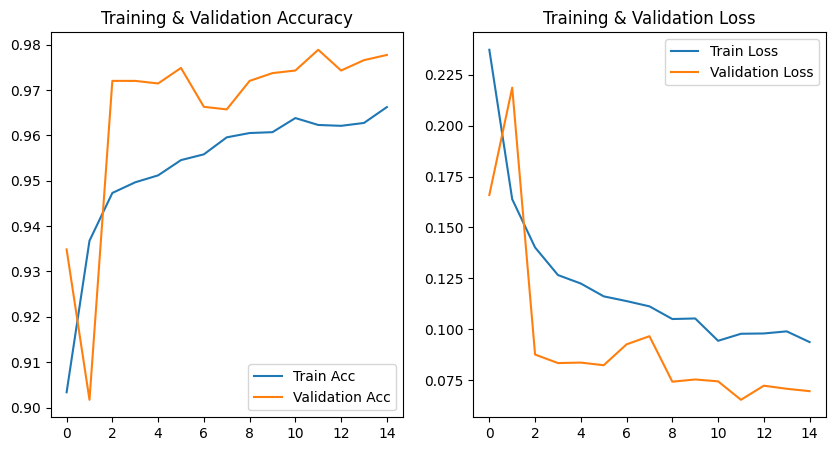

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.lineplot(model.history.history['acc'],label='Train Acc')
sns.lineplot(model.history.history['val_acc'],label='Validation Acc')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(122)
sns.lineplot(model.history.history['loss'],label='Train Loss')
sns.lineplot(model.history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()

In [ ]:
del model